In [38]:
%load_ext autoreload
%autoreload 2

import graphviz
import tempfile
from IPython.display import Markdown, display
try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)
    from helpers import plot_cwl, wrap_cwl

import cwl_utils
import cwl_utils.parser
from cwl_utils.parser import load_document_by_yaml, load_document
import yaml
from io import StringIO

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pattern 1 - one input/one output

The CWL includes: 
- one input parameter of type `Directory`
- one output parameter of type `Directory`

This scenario typically takes one input, applies an algorithm and produces a result

Implementation: delineate water bodies using NDWI and Otsu automatic threshold taking as input a Landsat-9 acquisition


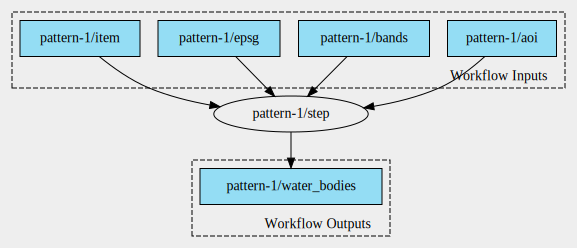

In [44]:
app_cwl_file = '../cwl-workflow/pattern-1.cwl'
graphviz.Source(plot_cwl(app_cwl_file, "pattern-1"))

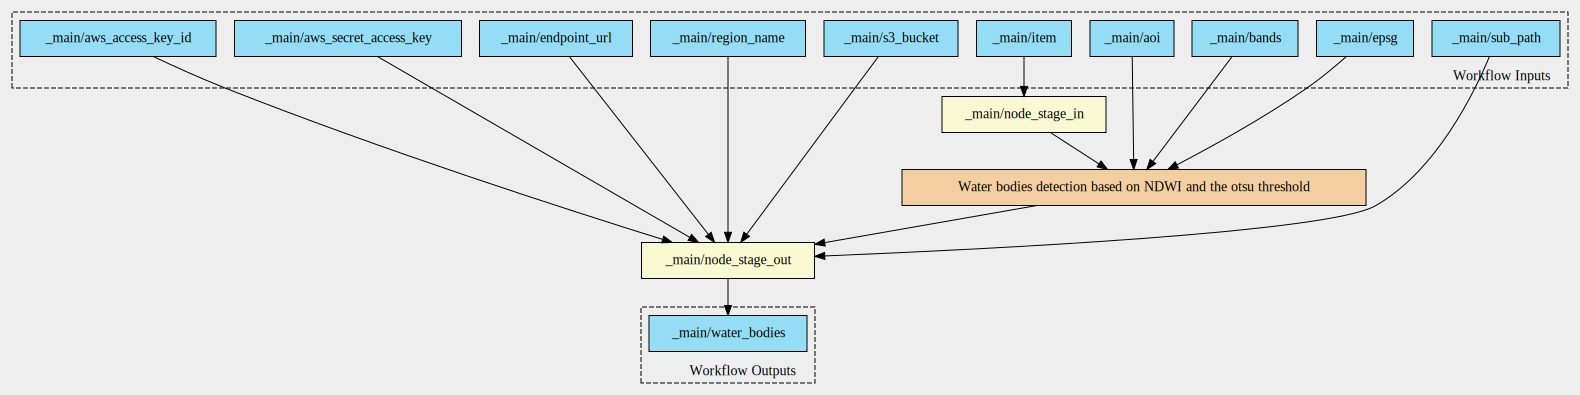

In [45]:
with tempfile.NamedTemporaryFile(suffix=".cwl", mode="w", delete=True) as tmp:
    tmp.write(wrap_cwl(app_cwl_file, "pattern-1"))
    tmp.flush()
    
    viz = plot_cwl(tmp.name, entrypoint="_main")
graphviz.Source(viz)

In [41]:
res = wrap_cwl(app_cwl_file, "water-bodies-detection")


In [42]:
res
with open("wrapped.cwl", "w") as f:
    f.write(res)

## Read the parameters

In [49]:


class WorkflowViewer():
    def __init__(self, cwl_file, entrypoint):
        self.cwl_file = cwl_file
        with open(cwl_file, 'r') as f:
            cwl_content = f.read()
        self.cwl_dict = yaml.safe_load(StringIO(cwl_content))
        self.workflow = load_document(self.cwl_dict, baseuri="file:///", id_=entrypoint)
        self.entrypoint = entrypoint
    def display_inputs(self):
        md = "## Inputs\n"
        headers = ["Id", "Type", "Label", "Doc"]
        md += "| " + " | ".join(headers) + " |\n"
        md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

        for inp in self.workflow.inputs:
            md += f"| `{inp.id.replace(f'file:///#{self.entrypoint}/', '')}` | {inp.type_} | {inp.label} | {inp.doc} |\n"
        
        display(Markdown(md))

    def display_outputs(self):
        md = "## Outputs\n"
        headers = ["Id", "Type", "Label", "Doc"]
        md += "| " + " | ".join(headers) + " |\n"
        md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

        for out in self.workflow.outputs:
            md += f"| `{out.id.replace(f'file:///#{self.entrypoint}/', '')}` | {out.type_} | {out.label} | {out.doc} |\n"
        
        display(Markdown(md))

    def display_steps(self):
        md = "## Steps\n"
        headers = ["Id", "Runs", "Label", "Doc"]
        md += "| " + " | ".join(headers) + " |\n"
        md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

        for step in self.workflow.steps:
            md += f"| `{step.id.replace(f'file:///#{self.entrypoint}/', '')}` | {step.run} | {step.label} | {step.doc} |\n"
        
        display(Markdown(md))

    def plot(self):
        return graphviz.Source(plot_cwl(self.cwl_file, self.entrypoint))


# app_cwl_file = '../cwl-workflow/pattern-1.cwl'

# res = wrap_cwl(app_cwl_file, "pattern-1")
# cwl_dict = yaml.safe_load(StringIO(res))

# # baseuri just needs to not interfere
# workflow = load_document(cwl_dict, baseuri="file:///", id_="_main")

In [50]:
wf = WorkflowViewer(app_cwl_file, "pattern-1")

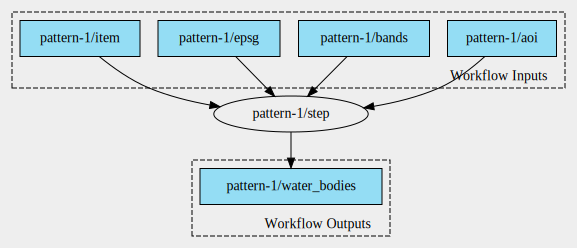

In [51]:
wf.plot()

In [52]:
wf.display_inputs()

## Inputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | string | area of interest | area of interest as a bounding box |
| `epsg` | string | EPSG code | EPSG code |
| `bands` | <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x76bfaaa4f350> | bands used for the NDWI | bands used for the NDWI |
| `item` | Directory | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


In [34]:
wf.display_outputs()

## Outputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | Directory | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


In [35]:
wf.display_steps()

## Steps
| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | file:///#clt | Water bodies detection | Water bodies detection based on NDWI and otsu threshold applied to a single Landsat-8/9 acquisition |


In [10]:
md = "## Inputs\n"

for inp in workflow.inputs:
    
    md += f"- `{inp.id.replace("file:///#_main/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Inputs
- `aoi`: string
- `aws_access_key_id`: string
- `aws_secret_access_key`: string
- `bands`: <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x76bfabe44690>
- `endpoint_url`: string
- `epsg`: string
- `item`: string
- `region_name`: string
- `s3_bucket`: string
- `sub_path`: string


In [11]:
md = "## Outputs\n"

for inp in workflow.outputs:
    
    md += f"- `{inp.id.replace("file:///#_main/", "")}`: {inp.type_}\n"

display(Markdown(md))

## Outputs
- `water_bodies`: string


In [21]:
with open(app_cwl_file, "r") as f:
    cwl_dict = yaml.safe_load(f)

#cwl_dict = yaml.safe_load(StringIO(res))

# baseuri just needs to not interfere
workflow = load_document(cwl_dict, baseuri="file:///", id_="pattern-1")

In [22]:
md = "## Inputs\n"
entrypoint = "pattern-1"
# write a markdown table with the inputs Id, type, label and doc

headers = ["Id", "Type", "Label", "Doc"]
md += "| " + " | ".join(headers) + " |\n"
md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

for inp in workflow.inputs:

    md += f"| `{inp.id.replace(f"file:///#{entrypoint}/", "")}` | {inp.type_} | {inp.label} | {inp.doc} |\n"

display(Markdown(md))

## Inputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | string | area of interest | area of interest as a bounding box |
| `epsg` | string | EPSG code | EPSG code |
| `bands` | <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x76bfbc773360> | bands used for the NDWI | bands used for the NDWI |
| `item` | Directory | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


In [23]:
# create a table with the steps Id, runs, label and doc
md = "## Steps\n"
headers = ["Id", "Runs", "Label", "Doc"]
md += "| " + " | ".join(headers) + " |\n"
md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

for step in workflow.steps:
    md += f"| `{step.id.replace(f"file:///#{entrypoint}/", "")}` | {step.run} | {step.label} | {step.doc} |\n"

display(Markdown(md))

## Steps
| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | file:///#clt | Water bodies detection | Water bodies detection based on NDWI and otsu threshold applied to a single Landsat-8/9 acquisition |


In [ ]:
md = "## Outputs\n"
entrypoint = "pattern-1"
# write a markdown table with the outputs Id, type, label and doc

headers = ["Id", "Type", "Label", "Doc"]
md += "| " + " | ".join(headers) + " |\n"
md += "| " + " | ".join(["---"] * len(headers)) + " |\n"

for out in workflow.outputs:

    md += f"| `{out.id.replace(f"file:///1#{entrypoint}/", "")}` | {out.type_} | {out.label} | {out.doc} |\n"


display(Markdown(md))

## Outputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | Directory | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |
